## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [28]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

office_df=pd.read_csv("datasets/office_episodes.csv")
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [29]:
cols=[]
for ind, row in office_df.iterrows():
    if row ['scaled_ratings']< 0.25:
        cols.append('red')
    elif row['scaled_ratings'] <0.5:
        cols.append('orange')
    elif row['scaled_ratings'] <0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

In [30]:
size=[]
for ind, row in office_df.iterrows():
    if row["has_guests"]==False:
        size.append(25)
    else:
        size.append(250)

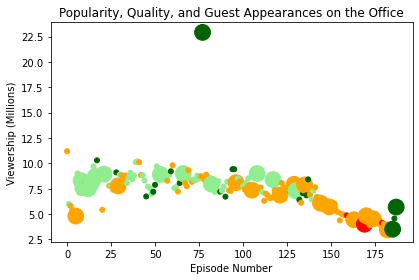

In [31]:
fig=plt.figure()
plt.scatter(x=office_df["episode_number"],y=office_df["viewership_mil"],c=cols,s=size)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [32]:
office_df[office_df["viewership_mil"]==office_df["viewership_mil"].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [33]:
top_star="Jessica Alba"